# Simular Cambios en el Valor de Acciones por medio del Método Estocástico Browniano en Python

### Dieter Esteban de Wit 15146 <br/>Luis Estuardo Delgado 17187



In [85]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import quandl

%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

In [86]:
# Variables
seed = 5      
N  = 2.**6  # Incremento para funcion escalon

start = "2017-01-01"
end = "2017-12-31"

### Movimiento Browniano

El primer paso del proyecto se centra en realizar el **Modelo de Movimiento Browniano**. Esto nos provee el calculo estocastico necesario para realizar las aproximaciones. 
Para poder realizar el Modelo generaremos una distribucion normal de variables aleatoreas dentro de *N(0,1)* y como siguiente paso multiplicaremos las variables aleatoreas generadas por la raiz cuadrada del resultado de una funcion escalon, y con esto retornar la suma cumulativa para generar el **Movimiento Browniano**.

In [87]:
def Brownian(seed, N):
    # Paso 1: Generar Distribucion Aleatoria
    np.random.seed(seed)           
    # Paso 2: Funcion Escalon
    dt = 1./N
    # Paso 3: Incremento Browniano, multiplicar la raiz del escalon por las variables aleatorias
    b = np.random.normal(0., 1., int(N))*np.sqrt(dt)
    # Paso 4: Camino Browniano, suma cumulativa
    W = np.cumsum(b) 
    return W, b


# Incremento Browniano
b = Brownian(seed, N)[1]

# Movimiento Browniano
W = Brownian(seed, N)[0]
W = np.insert(W, 0, 0.)

Si realizamos la grafica de **Incremento Browniano** podemos observar que la oscilacion parece aleatoria, sin embargo, si realizamos la grafica del **Movimiento Browniano** podemos observar que los valores no parecen oscilar, el movimiento es constante y fluido con pocos cambios abruptos, mas parecido al comportamiento de Acciones.

Text(0.5, 1.0, 'Incremento Browniano')

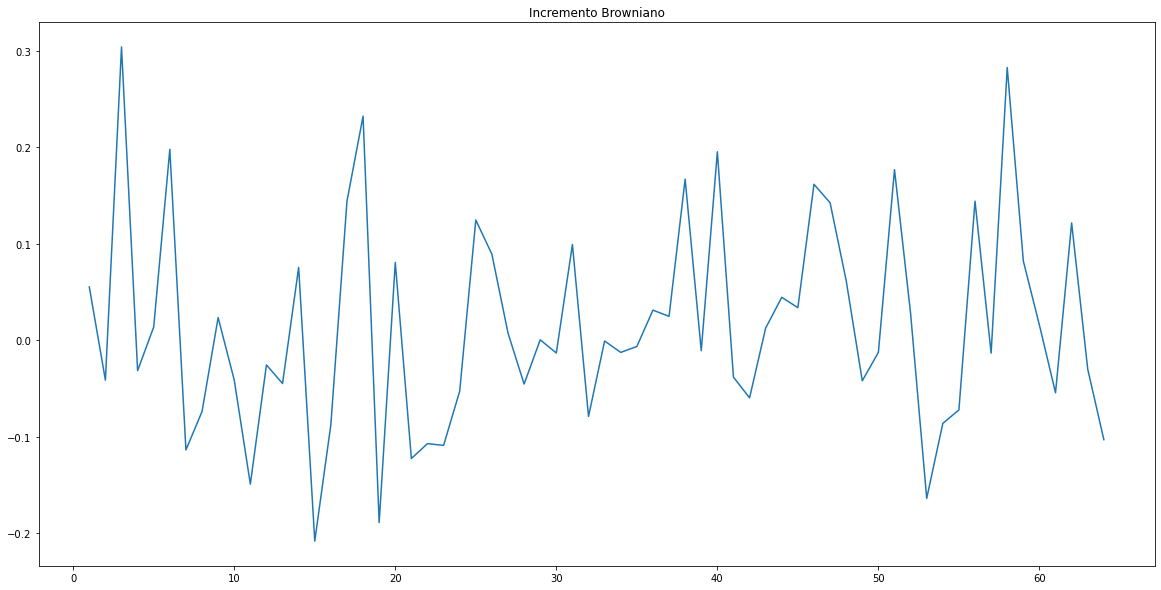

In [88]:
# Incremento Browniano
xb = np.linspace(1, len(b), len(b))
plt.plot(xb, b)
plt.title('Incremento Browniano')

Text(0.5, 1.0, 'Movimiento Browniano')

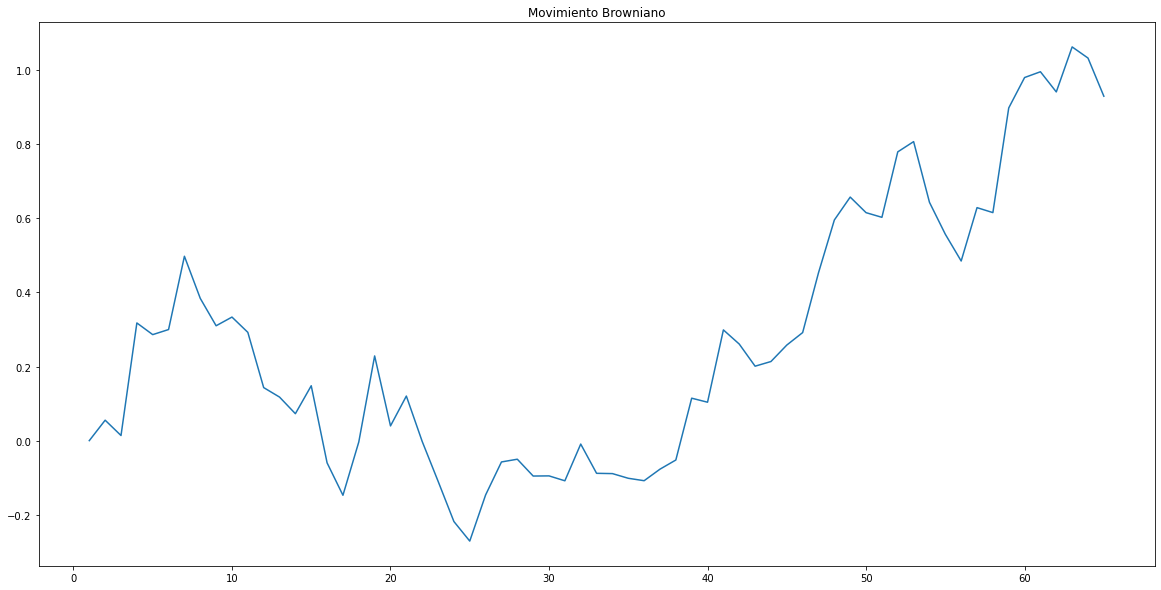

In [89]:
# Movimiento Browniano
xw = np.linspace(1, len(W), len(W))
plt.plot(xw, W)
plt.title('Movimiento Browniano')

### Movimiento Browniano Geometrico con Python

Ya teniendo el **Modelo de Movimiento Brownino** podemos avanzar a modelar la funcion cerrada para el **Movimiento Browniano Geometrico** utilizando la siguiente formula:

$$ S(t) = S_{0}e^{(\mu-\frac{1}{2}\sigma^2)t+\sigma W_t}$$

A continuacion utilizaremos algunos valores arbitrarios para generar una simulacion de retorno de Acciones:

Asumiremos el retorno de inversion $\mu$ como $0.15$, la volatibilidad $\sigma$  como $0.4$. La accion tendra un costo inicial $S_0$ de $ 55.25 $.

Text(0.5, 1.0, 'Movimiento Browniano Geometrico')

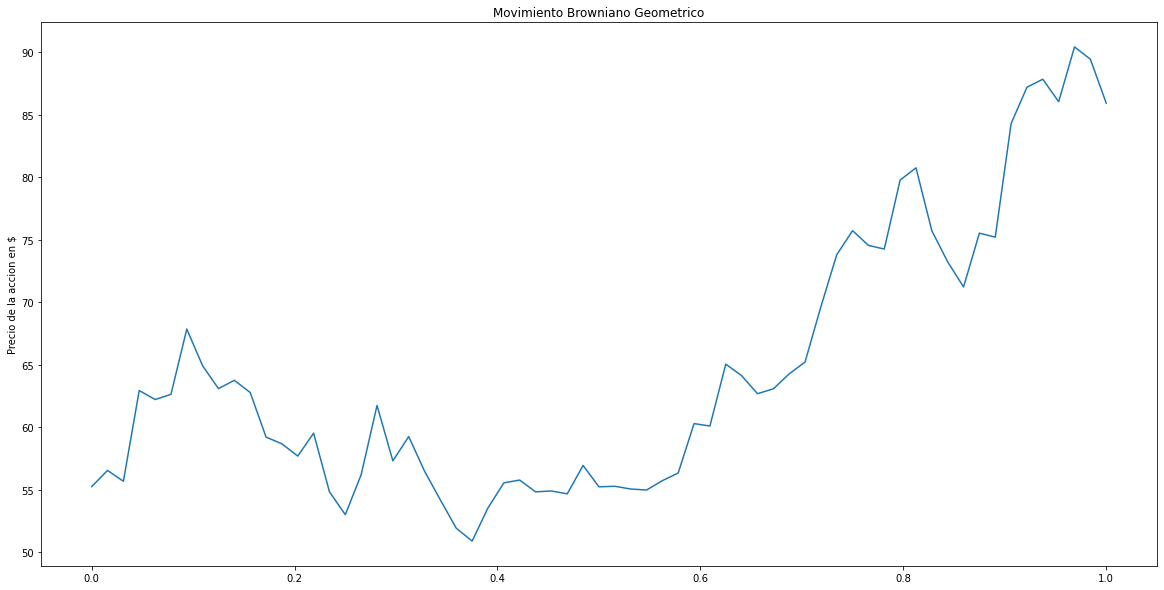

In [90]:
def GBM(So, mu, sigma, W, T, N):    
    t = np.linspace(0.,1.,int(N+1))
    S = []
    S.append(So)
    for i in range(1,int(N+1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So*np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t

So = 55.25
mu = 0.15
sigma = 0.4
W = Brownian(seed, N)[0]
T = 1.

# Solucion Exacta
soln = GBM(So, mu, sigma, W, T, N)[0] 
# Incremento en funcion de simulacion de tiempo
t = GBM(So, mu, sigma, W, T, N)[1]    

plt.plot(t, soln)
plt.ylabel('Precio de la accion en $')
plt.title('Movimiento Browniano Geometrico')

Al visualizar ambas graficas, la Simulacion con el Movimiento Browniano, parecen casi identicas. 
Lo unico que podria cambiar el resultado seria cambiar la variable con la que se calcula el **Movimiento Browniano**, la variable *seed*.

Text(0.5, 1.0, 'Movimiento Browniano Geometrico')

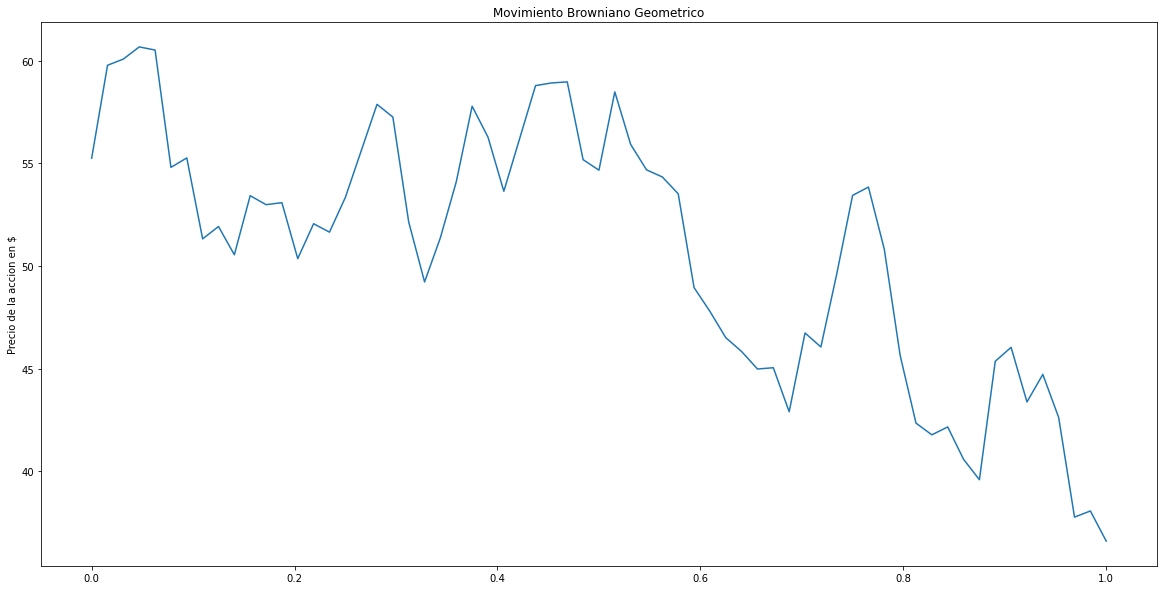

In [91]:
seed = 14
W = Brownian(seed, N)[0]

soln = GBM(So, mu, sigma, W, T, N)[0]  
t = GBM(So, mu, sigma, W, T, N)[1]     

plt.plot(t, soln)
plt.ylabel('Precio de la accion en $')
plt.title('Movimiento Browniano Geometrico')

Ahora es cuando podemos analizar las limitacion del modelo, como se puede ver el retorno de inversion y volatibilidad se representan como valores constantes, mientras que en la vida real estos deberian de ser representados por otro proceso estocastico.   

## Un ejemplo practico con Amazon

Se utilizaran los valores de Retorno de Amazon (AMZN) del 2017 proporcionados por la libreria [quandl](https://www.quandl.com/) para construir el modelo. Se realizaran multiples modelos y por ultimo utilizaremos una implementacion de la aproximacion Euler-Maruyama para poder proveer una solucion cerrada a el modelo.

In [92]:
df = quandl.get("WIKI/AMZN", start_date = start, end_date = end)

df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-01-03,757.92,758.7595,747.7000,753.67,3521066.0,0.0,1.0,757.92,758.7595,747.7000,753.67,3521066.0
2017-01-04,758.39,759.6800,754.2000,757.18,2510526.0,0.0,1.0,758.39,759.6800,754.2000,757.18,2510526.0
2017-01-05,761.55,782.3999,760.2557,780.45,5830068.0,0.0,1.0,761.55,782.3999,760.2557,780.45,5830068.0
2017-01-06,782.36,799.4400,778.4800,795.99,5986234.0,0.0,1.0,782.36,799.4400,778.4800,795.99,5986234.0
2017-01-09,798.00,801.7742,791.7700,796.92,3446109.0,0.0,1.0,798.00,801.7742,791.7700,796.92,3446109.0


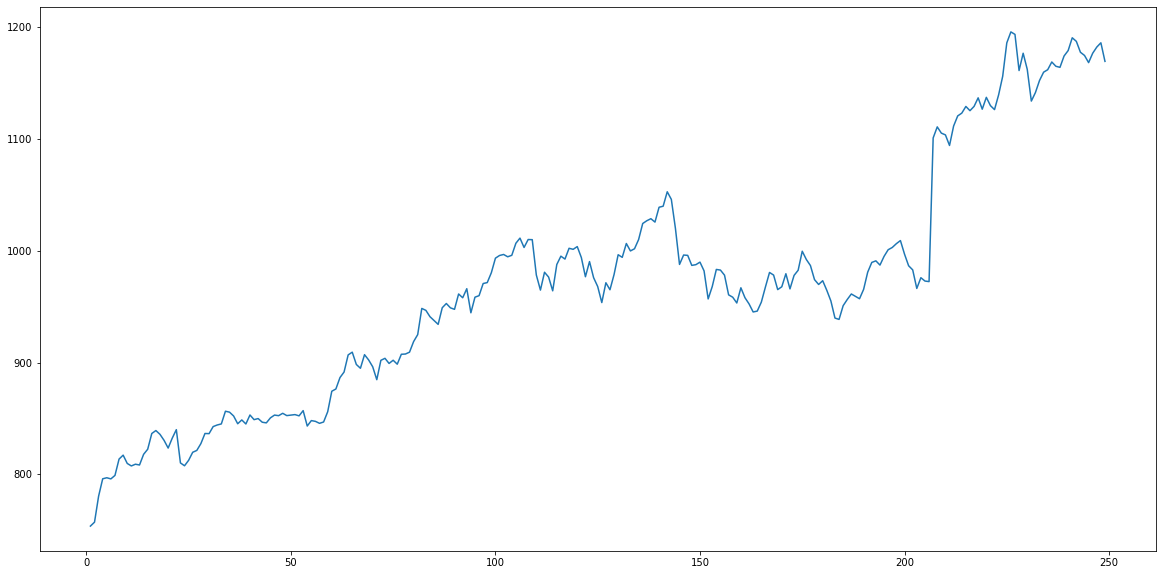

In [93]:
adj_close = df['Adj. Close']
time = np.linspace(1, len(adj_close), len(adj_close))

plt.plot(time, adj_close)

Para poder construir nuestro modelo necesitamos encontrar el coeficiente de desviacion y de difusion, los cuales obtendremos utilizando la siguiente funcion:

In [94]:
def daily_return(adj_close):
    returns = []
    for i in range(0, len(adj_close)-1):
        today = adj_close[i+1]
        yesterday = adj_close[i]
        daily_return = (today - yesterday)/yesterday
        returns.append(daily_return)
    return returns

returns = daily_return(adj_close)

# Coeficiente de Desviacion
mu = np.mean(returns)*252.       
# Coeficiente de Difusion
sig = np.std(returns)*np.sqrt(252.) 

print("Desviacion:", mu, "Deriva:", sig)

Desviacion: 0.46828665227272964 Deriva: 0.21032662094757437


Un año del mercado de acciones corresponde a $252$ dias, por lo cual multiplicamos la media de retorno y la varianza por este valor. 

### Modelo de Movimiento Browniano Geometrico

Text(0.5, 1.0, 'Movimiento Browniano Geometrico - AMZN')

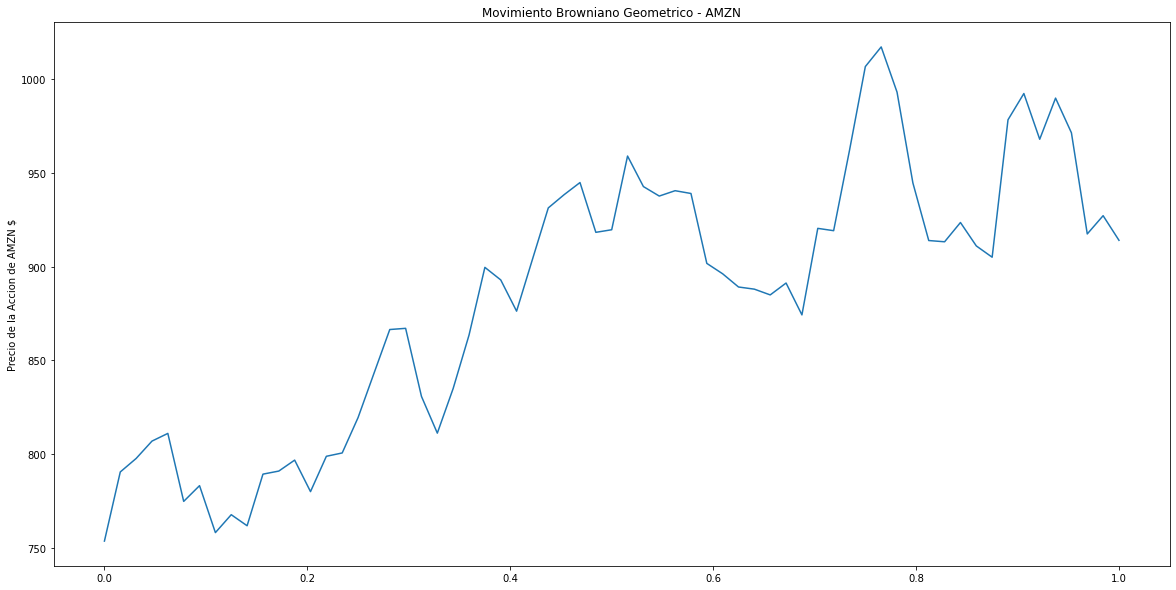

In [95]:
def GBM(So, mu, sigma, W, T, N):    
    t = np.linspace(0.,1., int(N+1))
    S = []
    S.append(So)
    for i in range(1,int(N+1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So*np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t

# Precio de la Accion inicial de Amazon en el 2017
So = adj_close[0]         
W = Brownian(seed, N)[0]

soln = GBM(So, mu, sig, W, T, N)[0] 
t = GBM(So, mu, sig, W, T, N)[1]

plt.plot(t, soln)
plt.ylabel('Precio de la Accion de AMZN $')
plt.title('Movimiento Browniano Geometrico - AMZN')

A continuacion veremos como se compara el Modelo con los datos reales.

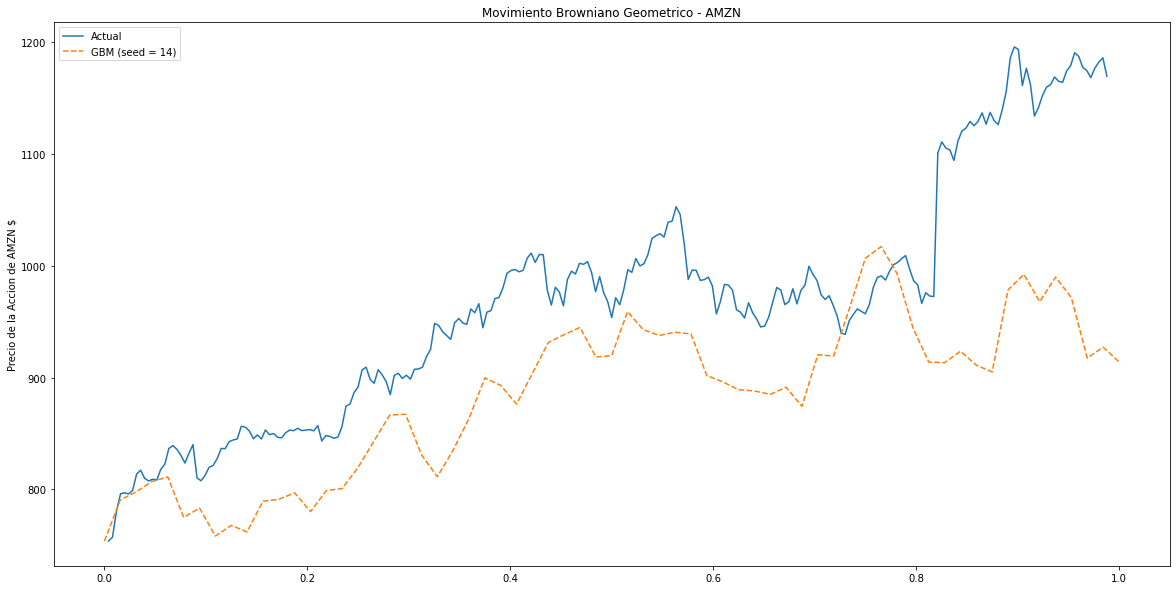

In [96]:
# Ajustamos el arreglo de tiempo de dias a años
time = np.linspace(1, len(adj_close), len(adj_close))
time = [i/252. for i in time]

plt.plot(time, adj_close, label = 'Actual')
plt.plot(t, soln, label = 'GBM (seed = 14)', ls='--')

plt.ylabel('Precio de la Accion de AMZN $')
plt.title('Movimiento Browniano Geometrico - AMZN')

plt.legend(loc = 'upper left')

Tambien podemos utilizar algunos valores random para el muestreo de datos en el Modelo Browniano

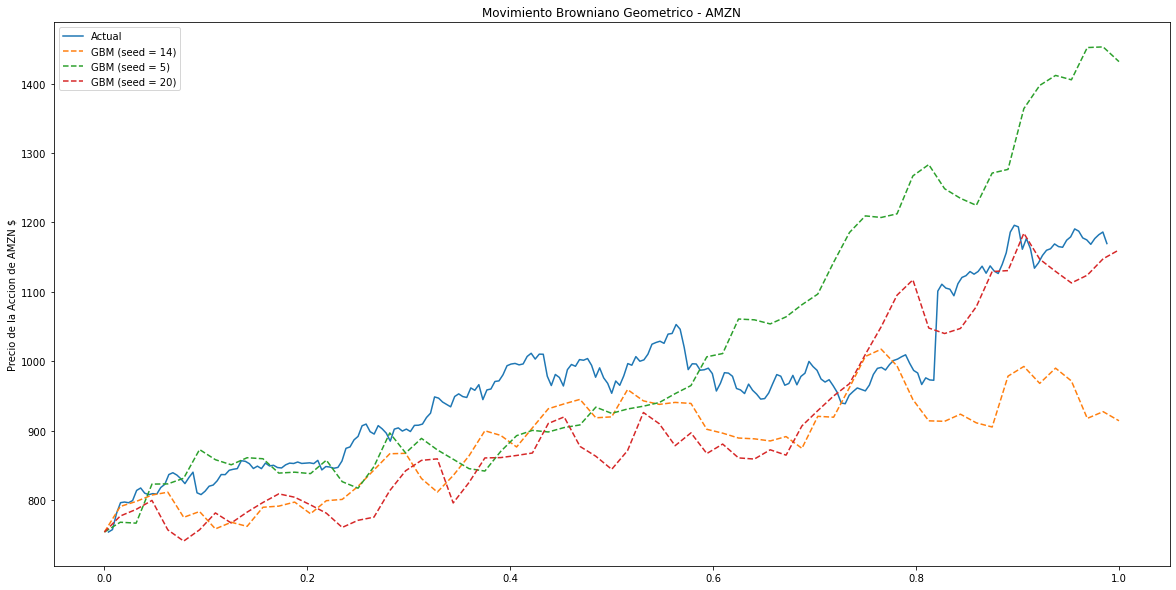

In [135]:
seed = 5
W = Brownian(seed, N)[0]
soln2 = GBM(So, mu, sig, W, T, N)[0]    

seed = 20
W = Brownian(seed, N)[0]
soln3 = GBM(So, mu, sig, W, T, N)[0]    

time = np.linspace(1, len(adj_close), len(adj_close))
time = [i/252. for i in time]

plt.plot(time, adj_close, label = 'Actual')
plt.plot(t, soln, label = 'GBM (seed = 14)', ls = '--')
plt.plot(t, soln2, label = 'GBM (seed = 5)', ls = '--')
plt.plot(t, soln3, label = 'GBM (seed = 20)', ls = '--')

plt.ylabel('Precio de la Accion de AMZN $')
plt.title('Movimiento Browniano Geometrico - AMZN')

plt.legend(loc = 'upper left')

Esto nos da una mejor representacion de como podemos hacer para ajustar el Modelo Browniano al comportamiento de las Acciones, sin realizar **overfitting**.

### Modelo Euler-Maruyama

Utilizaremos el modelo Euler-Maruyama para aproximar el **Camino Browniano**.

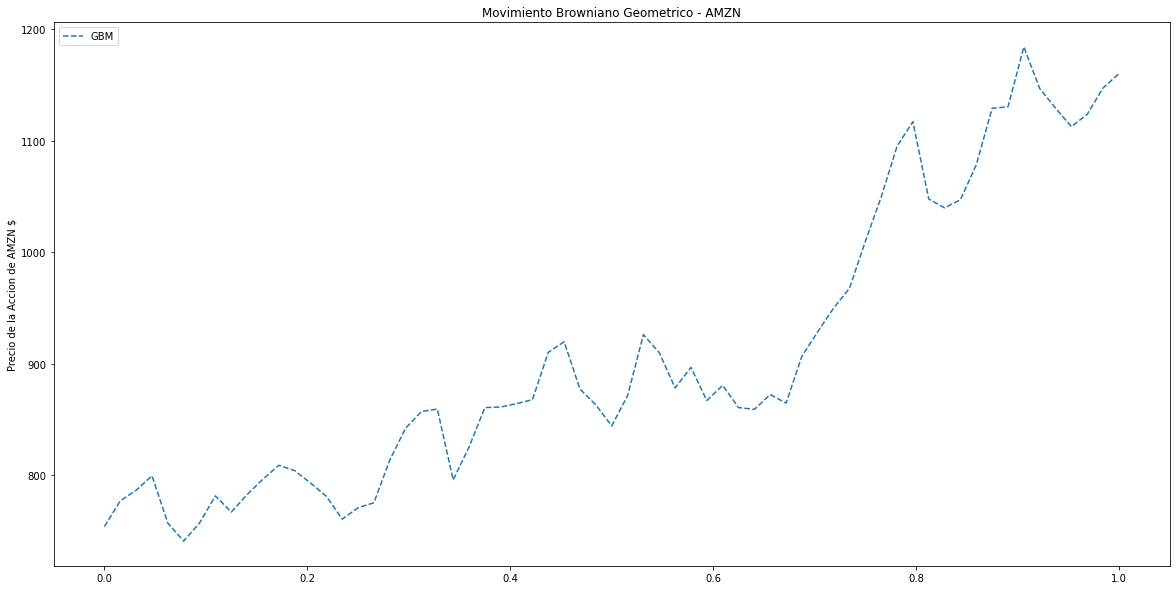

In [101]:
So = adj_close[0]

seed = 20
W = Brownian(seed, N)[0]
soln0 = GBM(So, mu, sig, W, T, N)[0]    

plt.plot(t, soln0, label = 'GBM', ls = '--')

plt.ylabel('Precio de la Accion de AMZN $')
plt.title('Movimiento Browniano Geometrico - AMZN')

plt.legend(loc = 'upper left')

EL Modelo de Aproximacion Euler-Maruyama es el siguiente:

$$w_{i+1} = w_i + \mu w_i \Delta t_i + \sigma w_i \Delta W_i$$

donde $\mu$ es el resultado de retorno anual esperado de AMZN, y $\sigma$ es la volatibilidad.

Algo a tomar en cuenta con este modelo es la diferencial de cambio en la funcion escalon, por lo cual realizaremos cierta cantidad de iteraciones a continuacion:

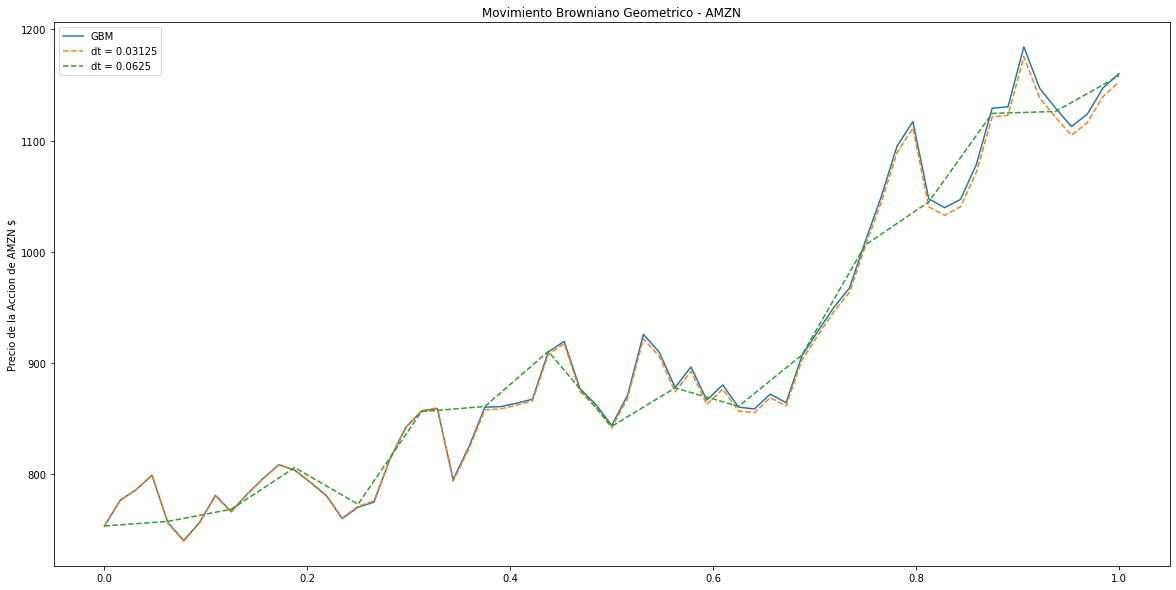

In [138]:
plt.plot(t, soln0, label ='GBM')


# Aproximacion Euler-Maruyama
def EM(So, mu, sigma, b, T, N, M):
    # Diferencial de cambio en la funcion escalon
    dt = M * (1/N)
    L = N / M
    wi = [So]
    for i in range(0,int(L)):
        Winc = np.sum(b[(M*(i-1)+M):(M*i + M)])
        w_i_new = wi[i]+mu*wi[i]*dt+sigma*wi[i]*Winc
        wi.append(w_i_new)
    return wi, dt


# Incremento Browniano con distinto diferencial de cambio
b = Brownian(seed, N)[1]  
M = 1                    
L = N/M
EM_approx_1 = EM(So, mu, sig, b, T, N, M)[0]
time_EM_1 = np.linspace(0.,1.,int(L+1))

# Incremento Browniano con distinto diferencial de cambio
b = Brownian(seed, N)[1] 
M = 4                    
L = N/M
EM_approx_2 = EM(So, mu, sig, b, T, N, M)[0]
time_EM_2 = np.linspace(0.,1.,int(L+1))


plt.plot(time_EM_1, EM_approx_1, label = 'dt = 0.03125', ls ='--')
plt.plot(time_EM_2, EM_approx_2, label = 'dt = 0.0625', ls ='--')


plt.ylabel('Precio de la Accion de AMZN $')
plt.title('Movimiento Browniano Geometrico - AMZN')

plt.legend(loc = 'upper left')

Como podemos ver, mientras mayor sea el diferencial de cambio para la funcion escalon menor el detalle, por lo que se pierde la exactitud de la prediccion. 

A continuacion una comparacion de el Modelo final Aproximado contra el valor de las Acciones real de Amazon

Text(0.5, 1.0, 'Movimiento Browniano Geometrico - AMZN')

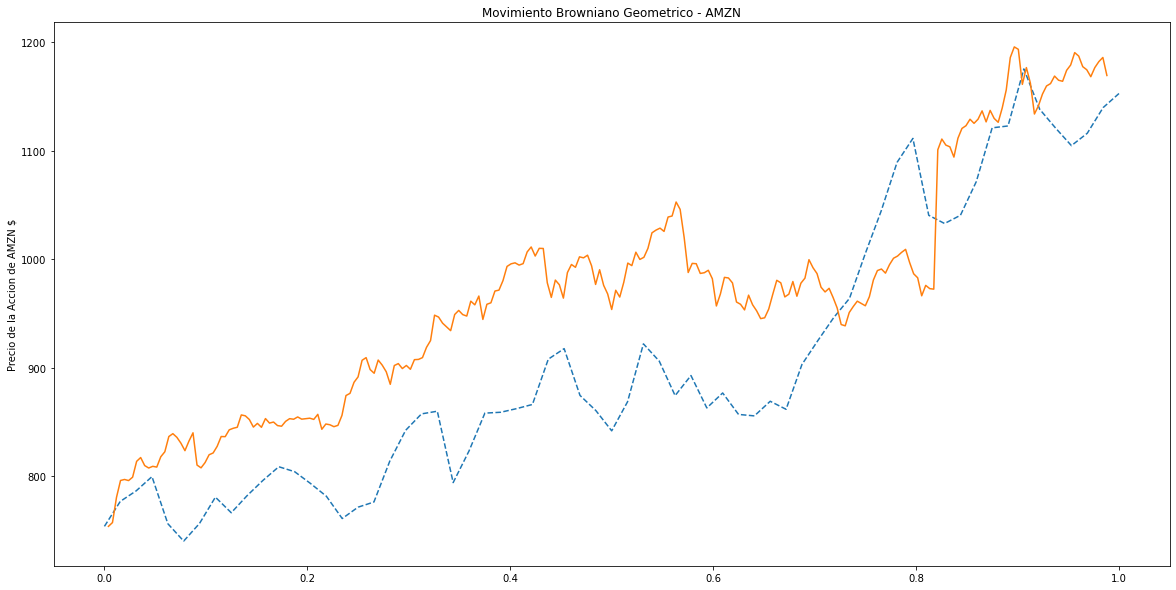

In [136]:
plt.plot(time_EM_1, EM_approx_1, label = 'dt = 0.03125', ls ='--')
plt.plot(time, adj_close, label = 'Actual')

plt.ylabel('Precio de la Accion de AMZN $')
plt.title('Movimiento Browniano Geometrico - AMZN')

## Conclusiones
* Un modelo estocastico nos provee una conjunto de caminos hipoteticos que pueden llegar a adaptarse para simular el movimiento de Acciones a traves del tiempo, sin embargo, estas soluciones rara vez pueden considerarse predicciones por su volatibilidad y correlacion poco certera.

* Ciertos modelos numericos pueden utilizarse para aproximar soluciones a modelos estocasticos, estas tambien pueden ser un suavizador de funciones con el contra de que se puede perder exactitud.